Importing the Libraries

In [11]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

Importing the Dataset

In [12]:
dataframe = pd.read_csv('IMDB Dataset.csv')
dataframe.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [13]:
#Converting the categorical data(sentiments) into binary form
dataframe['sentiment'] = np.where(dataframe['sentiment'] == 'positive', 1, 0)
dataframe.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [14]:
#Converting the labels and reviews to NumPy arrays..
sentences = dataframe['review'].to_numpy()
labels = dataframe['sentiment'].to_numpy()

Train Test Split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(sentences, labels, test_size=0.25)

In [16]:
x_train.shape


(37500,)

In [17]:
x_test.shape


(12500,)

In [18]:
# Performing Tokenization on Training Data
vocab_size = 10000
oov_tok = "<OOV>"
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

In [19]:
# Applying our tokenizer on whole Training dataset..
tokenizer.fit_on_texts(x_train)

In [20]:
tokenizer.word_counts


OrderedDict([('i', 115483),
             ('made', 12090),
             ('the', 499688),
             ('mistake', 604),
             ('of', 216487),
             ('watching', 6790),
             ('dark', 2044),
             ('star', 3026),
             ('1974', 100),
             ('late', 1749),
             ('one', 39776),
             ('night', 3184),
             ('many', 9980),
             ('years', 6567),
             ('ago', 1533),
             ('it', 117285),
             ('was', 71350),
             ('stupidest', 62),
             ('movies', 11419),
             ('that', 102447),
             ('have', 41477),
             ('ever', 9056),
             ('watched', 3362),
             ('br', 151886),
             ('1', 3207),
             ('bad', 13669),
             ('acting', 9581),
             ('2', 4246),
             ('writing', 1901),
             ('3', 2834),
             ('scientifically', 9),
             ('stupid', 2560),
             ('plot', 9732),
             ('dest

In [21]:
tokenizer.word_docs


defaultdict(int,
            {'must': 4193,
             'track': 549,
             'never': 7538,
             'unrealistic': 344,
             'i': 28816,
             '1': 2634,
             'acting': 7982,
             'one': 21275,
             'an': 18250,
             'matters': 318,
             'make': 9151,
             'and': 36217,
             'br': 21892,
             'planet': 453,
             'did': 7112,
             'entire': 1914,
             'plot': 7439,
             'have': 21373,
             'avoidable': 9,
             'beach': 267,
             'therefore': 488,
             'that': 29903,
             'stupid': 2025,
             'not': 22243,
             'again': 4833,
             'is': 33548,
             'thousands': 217,
             'destroying': 106,
             'star': 2388,
             'or': 15431,
             'drugs': 444,
             'resume': 68,
             '1974': 90,
             'do': 9960,
             'ball': 322,
             'many'

In [24]:
# Converting each textual review into a numerical sequence using the fitted tokenizer..
train_sequences = tokenizer.texts_to_sequences(x_train)
print(train_sequences[0])

[11, 91, 2, 1373, 5, 149, 458, 322, 5702, 529, 28, 308, 109, 151, 599, 10, 14, 28, 5, 2, 7982, 98, 13, 11, 26, 123, 293, 8, 8, 305, 77, 114, 8, 8, 238, 77, 491, 8, 8, 339, 1, 374, 112, 5399, 33, 442, 1293, 86, 92, 1, 7, 8179, 39, 9, 2, 96, 81, 62, 94, 2293, 433, 306, 5, 265, 28, 1010, 730, 1, 3082, 474, 26, 2972, 5, 4267, 19, 1384, 5703, 3, 51, 896, 4761, 6, 1355, 8, 8, 453, 334, 2058, 103, 4, 4317, 2422, 1903, 15, 4, 731, 1140, 2, 972, 207, 26, 75, 406, 99, 109, 1446, 8, 8, 22, 1249, 2, 2247, 5, 152, 13, 2667, 9, 458, 322, 111, 116, 239, 331, 5, 145, 13, 116, 76, 239, 331, 2, 2247, 111, 876, 172, 100, 458, 322, 1525, 265, 458, 322, 21, 1974, 114, 7285, 14, 4, 328, 322, 6, 1974, 114, 645]


In [25]:
# Limiting the sequence lengths..
sequence_length = 200
train_padded = pad_sequences(train_sequences, maxlen=sequence_length, padding='post', truncating='post')

Pre-Processing of Test data

In [26]:
test_sequences = tokenizer.texts_to_sequences(x_test)
test_padded = pad_sequences(test_sequences, maxlen=sequence_length, padding='post', truncating='post')

APPLYING DIFFERENT MDOELS:

1. NAIVE BAYES

In [27]:
# Importing libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [28]:
# Converting the sequences to text for CountVectorizer
train_texts = [' '.join(map(str, seq)) for seq in train_sequences]
test_texts = [' '.join(map(str, seq)) for seq in test_sequences]

In [29]:
# Creating a CountVectorizer to convert the text data to a bag-of-words representation
vectorizer = CountVectorizer(max_features=vocab_size)
X_train_count = vectorizer.fit_transform(train_texts)
X_test_count = vectorizer.transform(test_texts)

In [30]:
# Creating and training a Multinomial Naive Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(X_train_count, y_train)

MultinomialNB()

In [31]:
# Making predictions on the test set
y_pred_nb = nb_model.predict(X_test_count)

In [32]:
# Evaluating the Naive Bayes model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
classification_report_nb = classification_report(y_test, y_pred_nb)


In [33]:
print("Naive Bayes Accuracy:", accuracy_nb)
print("Naive Bayes Classification Report:\n", classification_report_nb)

Naive Bayes Accuracy: 0.8456
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85      6262
           1       0.86      0.83      0.84      6238

    accuracy                           0.85     12500
   macro avg       0.85      0.85      0.85     12500
weighted avg       0.85      0.85      0.85     12500



2. KNN

In [34]:
# Importing libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [35]:
# Converting the sequences to text for TF-IDF Vectorizer
train_texts = [' '.join(map(str, seq)) for seq in train_sequences]
test_texts = [' '.join(map(str, seq)) for seq in test_sequences]


In [36]:
# Creating a TF-IDF Vectorizer to convert the text data to numerical features
tfidf_vectorizer = TfidfVectorizer(max_features=vocab_size)
X_train_tfidf = tfidf_vectorizer.fit_transform(train_texts)
X_test_tfidf = tfidf_vectorizer.transform(test_texts)

In [37]:
# Creating and training a k-Nearest Neighbors classifier
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed
knn_model.fit(X_train_tfidf, y_train)

KNeighborsClassifier()

In [38]:
# Making predictions on the test set
y_pred_knn = knn_model.predict(X_test_tfidf)


In [39]:
# Evaluating the KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
classification_report_knn = classification_report(y_test, y_pred_knn)


In [40]:
print("KNN Accuracy:", accuracy_knn)
print("KNN Classification Report:\n", classification_report_knn)


KNN Accuracy: 0.76368
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.71      0.75      6262
           1       0.74      0.82      0.78      6238

    accuracy                           0.76     12500
   macro avg       0.77      0.76      0.76     12500
weighted avg       0.77      0.76      0.76     12500



3. DECISION TREES

In [41]:
# Importing libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [42]:
# Converting the sequences to text for TF-IDF Vectorizer
train_texts = [' '.join(map(str, seq)) for seq in train_sequences]
test_texts = [' '.join(map(str, seq)) for seq in test_sequences]

In [43]:
# Creating a TF-IDF Vectorizer to convert the text data to numerical features
tfidf_vectorizer = TfidfVectorizer(max_features=vocab_size)
X_train_tfidf = tfidf_vectorizer.fit_transform(train_texts)
X_test_tfidf = tfidf_vectorizer.transform(test_texts)

In [44]:
# Creating and training a Decision Tree classifier
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train_tfidf, y_train)

DecisionTreeClassifier()

In [46]:
# Making predictions on the test set
y_pred_decision_tree = decision_tree_model.predict(X_test_tfidf)


In [47]:
# Evaluating the Decision Tree model
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
classification_report_decision_tree = classification_report(y_test, y_pred_decision_tree)


In [48]:
print("Decision Tree Accuracy:", accuracy_decision_tree)
print("Decision Tree Classification Report:\n", classification_report_decision_tree)


Decision Tree Accuracy: 0.71712
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.72      0.72      6262
           1       0.72      0.72      0.72      6238

    accuracy                           0.72     12500
   macro avg       0.72      0.72      0.72     12500
weighted avg       0.72      0.72      0.72     12500



4. RANDOM FOREST

In [49]:
# Importing libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [50]:
# Converting the sequences to text for CountVectorizer
train_texts = [' '.join(map(str, seq)) for seq in train_sequences]
test_texts = [' '.join(map(str, seq)) for seq in test_sequences]


In [51]:
# Creating a CountVectorizer to convert the text data to a bag-of-words representation
vectorizer = CountVectorizer(max_features=vocab_size)
X_train_count = vectorizer.fit_transform(train_texts)
X_test_count = vectorizer.transform(test_texts)

In [52]:
# Creating and training a Random Forest classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train_count, y_train)

RandomForestClassifier(random_state=42)

In [53]:
# Making predictions on the test set
y_pred_random_forest = random_forest_model.predict(X_test_count)


In [54]:
# Evaluating the Random Forest model
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
classification_report_random_forest = classification_report(y_test, y_pred_random_forest)

In [55]:
print("Random Forest Accuracy:", accuracy_random_forest)
print("Random Forest Classification Report:\n", classification_report_random_forest)


Random Forest Accuracy: 0.85368
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.85      6262
           1       0.85      0.85      0.85      6238

    accuracy                           0.85     12500
   macro avg       0.85      0.85      0.85     12500
weighted avg       0.85      0.85      0.85     12500



5. SVM

In [56]:
# Importing libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [57]:
# Converting the sequences to text for TF-IDF Vectorizer
train_texts = [' '.join(map(str, seq)) for seq in train_sequences]
test_texts = [' '.join(map(str, seq)) for seq in test_sequences]

In [58]:
# Creating a TF-IDF Vectorizer to convert the text data to numerical features
tfidf_vectorizer = TfidfVectorizer(max_features=vocab_size)
X_train_tfidf = tfidf_vectorizer.fit_transform(train_texts)
X_test_tfidf = tfidf_vectorizer.transform(test_texts)

In [59]:
# Creating and training a Support Vector Machine (SVM) classifier
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_tfidf, y_train)

SVC(kernel='linear', random_state=42)

In [60]:
# Making predictions on the test set
y_pred_svm = svm_model.predict(X_test_tfidf)

In [61]:
# Evaluating the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_report_svm = classification_report(y_test, y_pred_svm)

In [62]:
print("SVM Accuracy:", accuracy_svm)
print("SVM Classification Report:\n", classification_report_svm)

SVM Accuracy: 0.9004
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      6262
           1       0.89      0.91      0.90      6238

    accuracy                           0.90     12500
   macro avg       0.90      0.90      0.90     12500
weighted avg       0.90      0.90      0.90     12500



6. LONG SHORT TERM MEMORY

In [63]:
# Model definition
model = Sequential()

In [64]:
# Embedding layer
embedding_dim = 16
model.add(Embedding(vocab_size, embedding_dim, input_length=sequence_length))

In [65]:
lstm_out = 32
model.add(Bidirectional(LSTM(lstm_out)))

In [66]:
# Layer with RELU activation
model.add(Dense(10, activation='relu'))

In [67]:
# Output Layer
model.add(Dense(1, activation='sigmoid'))

In [68]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [69]:
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 16)           160000    
                                                                 
 bidirectional (Bidirectiona  (None, 64)               12544     
 l)                                                              
                                                                 
 dense (Dense)               (None, 10)                650       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 173,205
Trainable params: 173,205
Non-trainable params: 0
_________________________________________________________________
None


In [70]:
# Using EarlyStopping(): which will halt the model training after the model fails to minimize the validation loss value after the stated no. of epochs in the callback parameters..

checkpoint_filepath = os.getcwd()
model_checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath, save_weights_only=False, monitor='val_loss', mode='min', save_best_only=True)
callbacks = [EarlyStopping(patience=2), model_checkpoint_callback]

In [71]:
# Saving the model params in the ‘history’ variable
history = model.fit(train_padded, y_train, epochs=10, validation_data=(test_padded, y_test), callbacks=callbacks)


Epoch 1/10
1172/1172 [==============================] - ETA: 0s - loss: 0.5580 - accuracy: 0.7019

INFO:tensorflow:Assets written to: c:\Users\bhavi\OneDrive\Desktop\Github\Sentiment-Analysis\assets


INFO:tensorflow:Assets written to: c:\Users\bhavi\OneDrive\Desktop\Github\Sentiment-Analysis\assets


1172/1172 [==============================] - 109s 89ms/step - loss: 0.5580 - accuracy: 0.7019 - val_loss: 0.4073 - val_accuracy: 0.8182
Epoch 2/10
1172/1172 [==============================] - ETA: 0s - loss: 0.3295 - accuracy: 0.8639

INFO:tensorflow:Assets written to: c:\Users\bhavi\OneDrive\Desktop\Github\Sentiment-Analysis\assets


INFO:tensorflow:Assets written to: c:\Users\bhavi\OneDrive\Desktop\Github\Sentiment-Analysis\assets


1172/1172 [==============================] - 115s 98ms/step - loss: 0.3295 - accuracy: 0.8639 - val_loss: 0.3206 - val_accuracy: 0.8715
Epoch 3/10
1172/1172 [==============================] - ETA: 0s - loss: 0.2571 - accuracy: 0.8991

INFO:tensorflow:Assets written to: c:\Users\bhavi\OneDrive\Desktop\Github\Sentiment-Analysis\assets


INFO:tensorflow:Assets written to: c:\Users\bhavi\OneDrive\Desktop\Github\Sentiment-Analysis\assets


1172/1172 [==============================] - 121s 104ms/step - loss: 0.2571 - accuracy: 0.8991 - val_loss: 0.3121 - val_accuracy: 0.8734
Epoch 4/10
1172/1172 [==============================] - 113s 97ms/step - loss: 0.2183 - accuracy: 0.9164 - val_loss: 0.3192 - val_accuracy: 0.8719
Epoch 5/10
1172/1172 [==============================] - 116s 99ms/step - loss: 0.1901 - accuracy: 0.9290 - val_loss: 0.3231 - val_accuracy: 0.8694


In [72]:
metrics_df = pd.DataFrame(history.history)
print(metrics_df)

       loss  accuracy  val_loss  val_accuracy
0  0.557982  0.701947  0.407310       0.81816
1  0.329479  0.863920  0.320623       0.87152
2  0.257067  0.899120  0.312065       0.87344
3  0.218338  0.916373  0.319192       0.87192
4  0.190077  0.929040  0.323144       0.86944


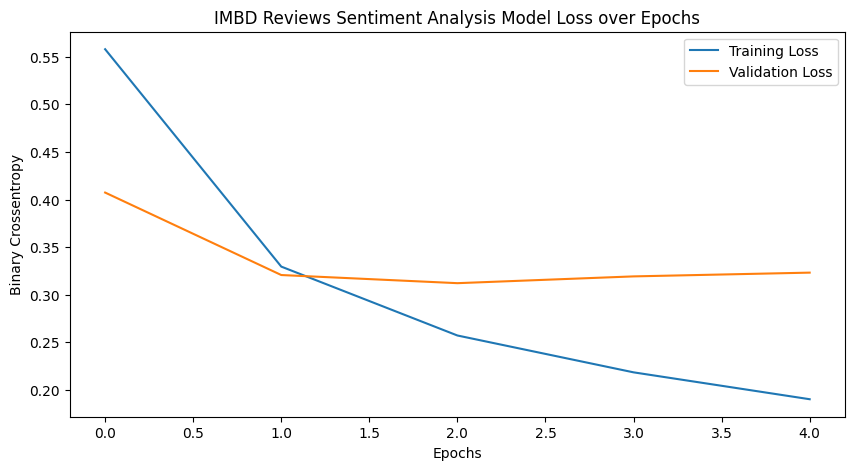

In [73]:
# VISUALIZATION..
plt.figure(figsize=(10,5))
plt.plot(metrics_df.index, metrics_df.loss)
plt.plot(metrics_df.index, metrics_df.val_loss)
plt.title('IMBD Reviews Sentiment Analysis Model Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Binary Crossentropy')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

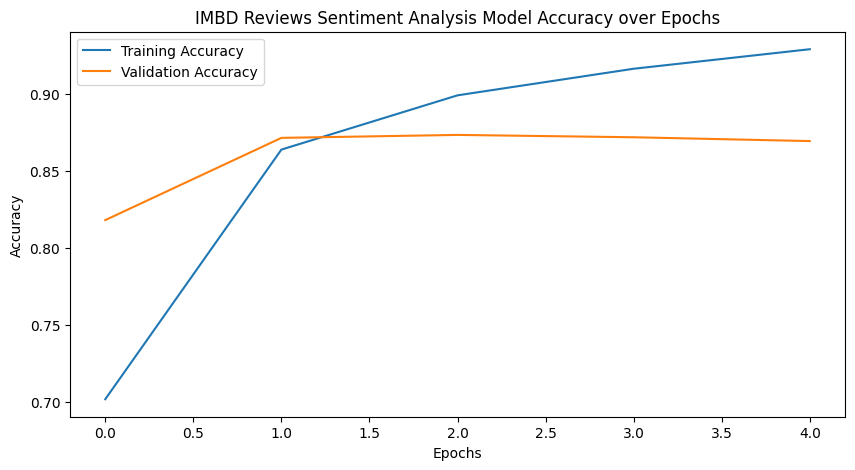

In [74]:
plt.figure(figsize=(10,5))
plt.plot(metrics_df.index, metrics_df.accuracy)
plt.plot(metrics_df.index, metrics_df.val_accuracy)
plt.title('IMBD Reviews Sentiment Analysis Model Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

In [80]:
# Extracting the accuracy from the history dictionary
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Finding the epoch with the highest validation accuracy
best_epoch = np.argmax(val_accuracy)

# Getting the best accuracy values
best_train_accuracy = train_accuracy[best_epoch]
best_val_accuracy = val_accuracy[best_epoch]

# Storing the best validation accuracy in a new variable
accuracy_lstm = best_val_accuracy

# Printing the results
print("Best Epoch:", best_epoch)
print("Best Training Accuracy:", best_train_accuracy)
print("Best Validation Accuracy:", best_val_accuracy)

Best Epoch: 2
Best Training Accuracy: 0.8991199731826782
Best Validation Accuracy: 0.8734400272369385


RESULTS: MODEL WITH BEST ACCURACY

In [81]:
# Create an array of accuracies and corresponding models
accuracies = [accuracy_nb, accuracy_knn, accuracy_decision_tree, accuracy_random_forest, accuracy_svm, accuracy_lstm]
models = ['Naive Bayes', 'K-Nearest Neighbour', 'Decision Tree', 'Random Forest', 'Support Vector Machine', 'Long Short Term Memory']

# Find the best model
best_model_index = np.argmax(accuracies)
best_model = models[best_model_index]
best_accuracy = accuracies[best_model_index]

# Print the results
print("Model Accuracies:")
for model, accuracy in zip(models, accuracies):
    print(f"{model}: {accuracy:.4f}")

print("\nBest Model:")
print(f"The best model is {best_model} with accuracy: {best_accuracy:.4f}")



Model Accuracies:
Naive Bayes: 0.8456
K-Nearest Neighbour: 0.7637
Decision Tree: 0.7171
Random Forest: 0.8537
Support Vector Machine: 0.9004
Long Short Term Memory: 0.8734

Best Model:
The best model is Support Vector Machine with accuracy: 0.9004
